In [394]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [201]:
series=pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")

In [203]:
cases = pd.read_csv('/kaggle/input/corona-virus-report/day_wise.csv')

In [255]:
cases.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


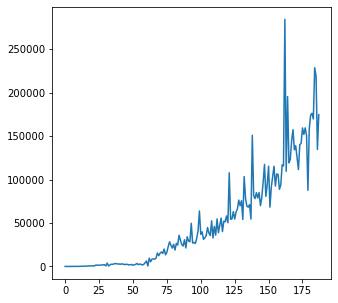

In [263]:
cases['New recovered'].plot()

In [264]:
cases.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [175]:
import matplotlib.pyplot as plt

Forecasting the Covid-19 Situation around the World (Generalised Model Globally)

In [265]:
cases.isnull().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [267]:
cases.shape

(188, 12)

In [270]:
recovered = cases[['Date','New recovered']]

In [271]:
recovered['Date'].min(),series['Date'].max()

('2020-01-22', '2020-07-14')

In [273]:
recov=recovered.loc[(recovered['Date']>'2020-05-16' )& (recovered['Date'] < '2020-07-15')].copy()

In [275]:
recov=recov.groupby('Date')['New recovered'].sum().reset_index()

In [276]:
recov.head()

,Date,New recovered
0,2020-05-17,40153
1,2020-05-18,52210
2,2020-05-19,51347
3,2020-05-20,58185
4,2020-05-21,50327


In [314]:
rtoll = recov.copy()

In [315]:
rtoll.head()

,Date,New recovered
0,2020-05-17,40153
1,2020-05-18,52210
2,2020-05-19,51347
3,2020-05-20,58185
4,2020-05-21,50327


In [316]:
rtoll.set_index('Date',inplace=True)

In [317]:
rtoll.index = pd.to_datetime(rtoll.index)

In [318]:
rtoll.head()

,New recovered
Date,
2020-05-17,40153
2020-05-18,52210
2020-05-19,51347
2020-05-20,58185
2020-05-21,50327


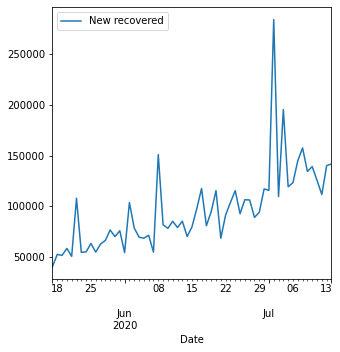

In [319]:
from pylab import rcParams
rcParams['figure.figsize'] =5,5
rtoll.plot()

Using the dicky fuller method for testing stationarity of the data

In [320]:
from statsmodels.tsa.stattools import adfuller

In [321]:
test_results = adfuller(rtoll['New recovered'])

In [322]:
#Ho: It is Not Stattionary
#HA : It is Stationary

def adfuller_test (deaths):
    result = adfuller(deaths)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+':'+ str(value))
    if(result[1]<=0.05):
        print("Stationary")
    else:
        print("Not Stationary")

In [323]:
adfuller_test(rtoll['New recovered'])

ADF Test Statistic:-2.3399398776581313
p-value:0.15940983099958256
#Lags Used:1
Number of Observations Used:57
Not Stationary


As we can see that the p value greater them 0.05 and thus data is Not Stationary... Accept Null Hypothesis

Differencing Used To Make Data Stationary

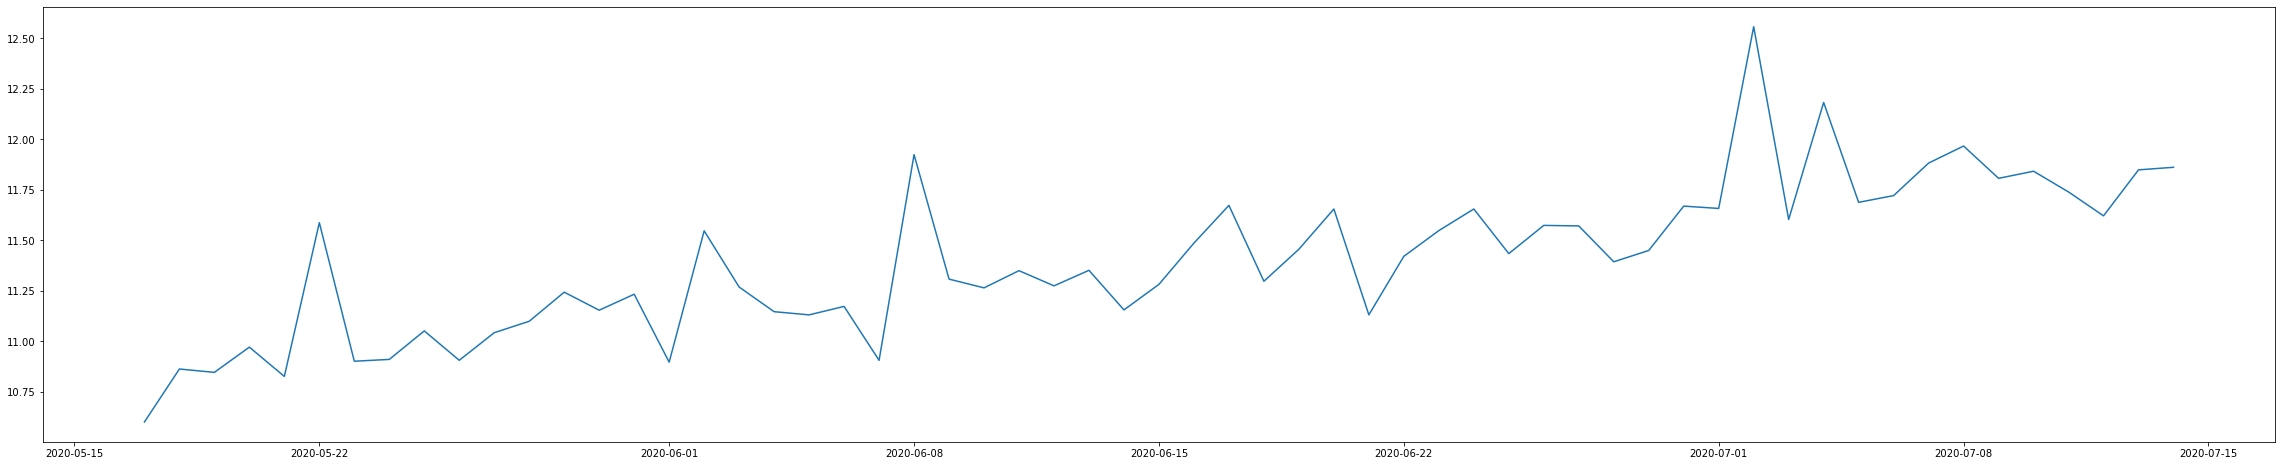

In [324]:
plt.figure(figsize=(40,8))
plt.plot(np.log(rtoll['New recovered']))

In [325]:
rtoll['New recovered Diff'] = rtoll['New recovered']-rtoll['New recovered'].shift(1)

In [326]:
adfuller_test(rtoll['New recovered Diff'].dropna())

ADF Test Statistic:-6.092919544873861
p-value:1.0261885233295403e-07
#Lags Used:4
Number of Observations Used:53
Stationary


In [327]:
rtoll.isnull().sum()

New recovered         0
New recovered Diff    1
dtype: int64

In [328]:
rtoll.drop(['New recovered'],axis=1,inplace=True)

******As you can see that the data has become stationary after differencing**

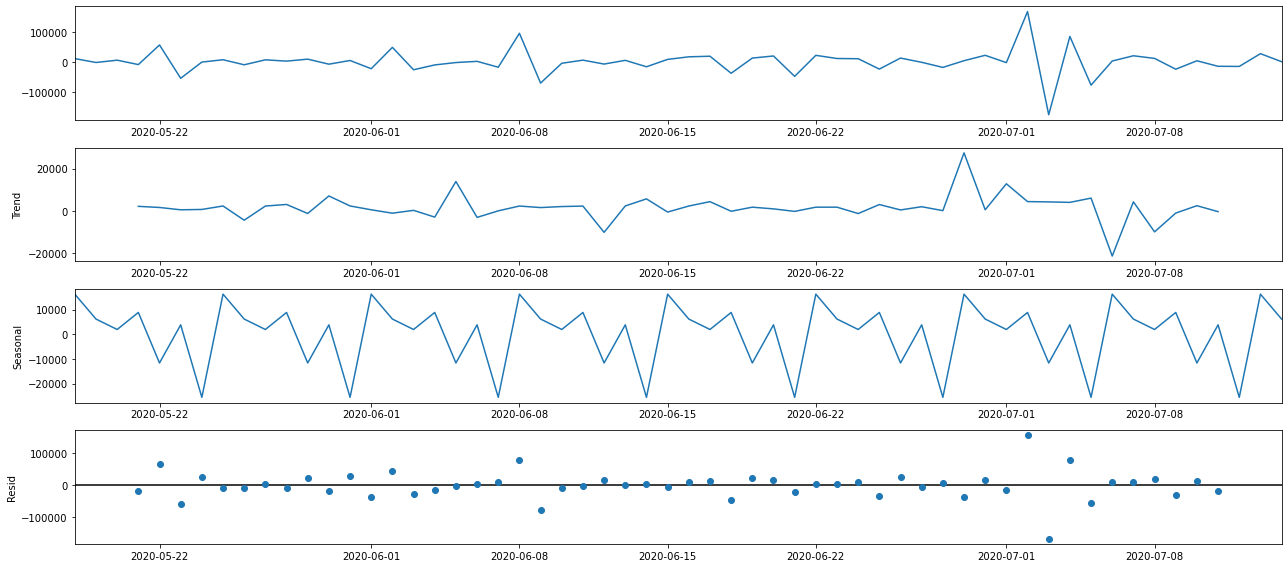

In [329]:
from pylab import rcParams 
rcParams['figure.figsize'] =18,8
decomposition = sm.tsa.seasonal_decompose(rtoll.dropna(),model='additive')
fig = decomposition.plot()
plt.show()

# **ARIMA MODEL FOR TIME SERIES FORECASTING OF RECOVERED CASES**

In [330]:
rtoll.head()

,New recovered Diff
Date,
2020-05-17,NaN
2020-05-18,12057.0
2020-05-19,-863.0
2020-05-20,6838.0
2020-05-21,-7858.0


In [331]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


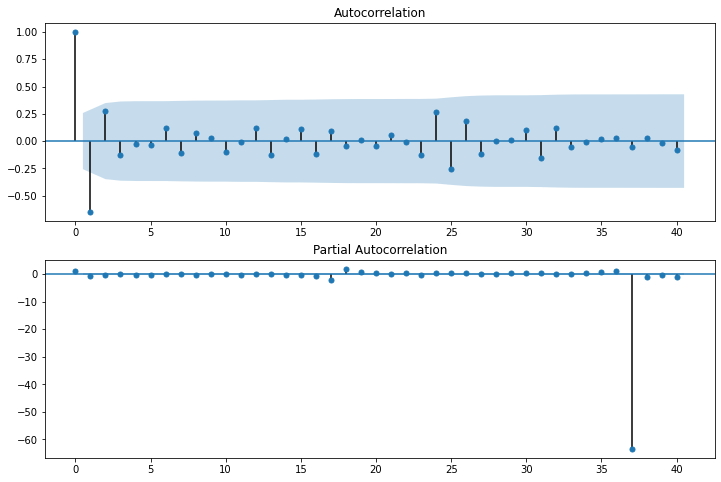

In [334]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(rtoll['New recovered Diff'].iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(rtoll['New recovered Diff'].iloc[1:],lags=40,ax=ax2)

From the Above Graph we can see that p value is 1 , as it shuts of in that position , q=0 because the exponential characteristics is unseen

In [384]:
from statsmodels.tsa.arima_model import ARIMA

In [390]:
p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [395]:
for param in pdq:
        try:
            model=ARIMA(rtoll['New recovered Diff'].dropna(),order=param)
            results=model.fit()
            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

ARIMA(0, 0, 0)- AIC:1406.1326894323236
ARIMA(0, 0, 1)- AIC:1365.8018967416963
ARIMA(0, 1, 0)- AIC:1450.837953657275
ARIMA(0, 1, 1)- AIC:nan
ARIMA(1, 0, 0)- AIC:1377.3280305269634
ARIMA(1, 1, 0)- AIC:1400.1246673510786


In [396]:
model = ARIMA(rtoll['New recovered Diff'].dropna(),order=(0,0,1))

In [397]:
results=model.fit()

In [398]:
rtoll['Forecast']=results.predict(start=pd.to_datetime('2020-07-01'),dynamic=False)

In [399]:
rtoll['Forecast'].tail(5)

Date
2020-07-10     4803.473329
2020-07-11     1684.529747
2020-07-12    16649.498297
2020-07-13    31783.085360
2020-07-14     4901.707219
Name: Forecast, dtype: float64

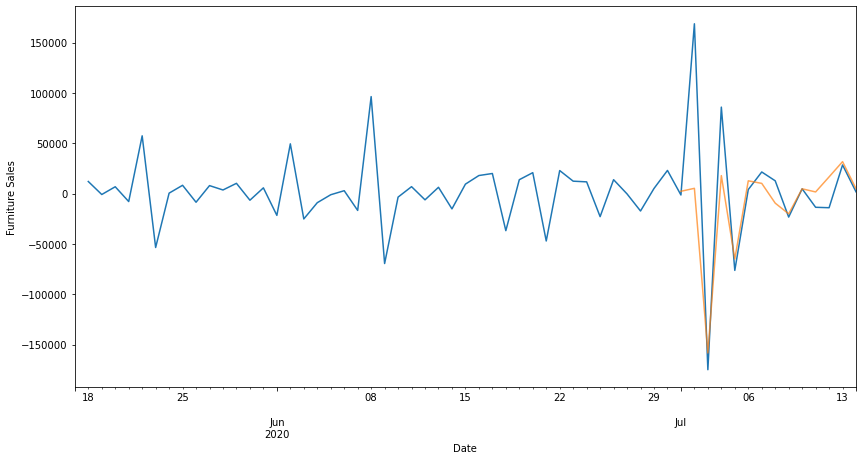

In [400]:
ax=rtoll['New recovered Diff'].plot(label='Observed')
rtoll['Forecast'].plot(ax=ax,label='Predicted',alpha=.7,figsize=(14,7))
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.show()